In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
df = pd.read_csv('/content/DUTCHBANGL.csv' , parse_dates=['DATE'])

In [3]:
df.head()

#       DATE TRADING CODE   LTP*  ...    YCP  TRADE  VALUE (mn)    VOLUME
0  437 2018-05-08   DUTCHBANGL  119.0  ...  120.4   73.0       1.970   16562.0
1  436 2018-06-08   DUTCHBANGL  117.3  ...  118.9  119.0       3.981   33758.0
2  435 2018-07-08   DUTCHBANGL  117.6  ...  117.8  211.0       7.775   65891.0
3  434 2018-08-08   DUTCHBANGL  120.5  ...  117.6  322.0      18.579  156042.0
4  433 2018-09-08   DUTCHBANGL  122.4  ...  119.4  630.0      25.629  209254.0

[5 rows x 12 columns]

In [4]:
#volatility calculation

import numpy as np
import scipy.stats as si
import sympy as sy
from sympy.stats import Normal, cdf
from sympy import init_printing
init_printing()

In [5]:
from scipy.stats import skew
import pylab as p  

In [6]:

# Compute Daily Return1
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [7]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)

In [8]:
df.head(50)

#       DATE TRADING CODE  ...    VOLUME  daily_ret  volatility
0   437 2018-05-08   DUTCHBANGL  ...   16562.0   0.000000    0.000000
1   436 2018-06-08   DUTCHBANGL  ...   33758.0  -0.009251    0.000000
2   435 2018-07-08   DUTCHBANGL  ...   65891.0  -0.001698    0.000000
3   434 2018-08-08   DUTCHBANGL  ...  156042.0   0.015306    0.000000
4   433 2018-09-08   DUTCHBANGL  ...  209254.0   0.018425    0.000000
5   432 2018-12-08   DUTCHBANGL  ...  398312.0   0.097039    0.000000
6   431 2018-08-13   DUTCHBANGL  ...  294799.0  -0.014993    0.000000
7   430 2018-08-14   DUTCHBANGL  ...  133725.0  -0.010654    0.000000
8   429 2018-08-16   DUTCHBANGL  ...  191768.0   0.033077    0.000000
9   428 2018-08-19   DUTCHBANGL  ...  208421.0   0.017126    0.000000
10  427 2018-08-20   DUTCHBANGL  ...  143187.0  -0.019766    0.000000
11  426 2018-08-26   DUTCHBANGL  ...  136942.0  -0.033607    0.000000
12  425 2018-08-27   DUTCHBANGL  ...  117713.0   0.012365    0.000000
13  424 2018-08-28   DUTCHBANGL  ...  103779.0   0.016794    0.000000
14  423 2018-08-29   DUTCHBANGL  ...   62599.0  -0.009009    0.000000
15  422 2018-08-30   DUTCHBANGL  ...  100515.0  -0.013636    0.000000
16  421 2018-03-09   DUTCHBANGL  ...   67513.0  -0.004608    0.000000
17  420 2018-04-09   DUTCHBANGL  ...   55755.0  -0.011574    0.000000
18  419 2018-05-09   DUTCHBANGL  ...   51332.0   0.000000    0.000000
19  418 2018-06-09   DUTCHBANGL  ...   53078.0   0.000781    0.000000
20  417 2018-09-09   DUTCHBANGL  ...   55196.0  -0.009360    0.026475
21  416 2018-10-09   DUTCHBANGL  ...   50964.0  -0.010236    0.026635
22  415 2018-11-09   DUTCHBANGL  ...   35220.0   0.008751    0.026511
23  414 2018-12-09   DUTCHBANGL  ...   48368.0  -0.020505    0.027020
24  413 2018-09-13   DUTCHBANGL  ...   75800.0  -0.001610    0.026885
25  412 2018-09-16   DUTCHBANGL  ...   42304.0  -0.001613    0.026632
26  411 2018-09-17   DUTCHBANGL  ...   26839.0  -0.000808    0.015074
27  410 2018-09-18   DUTCHBANGL  ...   24860.0   0.002425    0.014887
28  409 2018-09-19   DUTCHBANGL  ...   19866.0   0.007258    0.014919
29  408 2018-09-20   DUTCHBANGL  ...   34029.0  -0.008006    0.012636
30  407 2018-09-23   DUTCHBANGL  ...   20841.0  -0.001614    0.011716
31  406 2018-09-24   DUTCHBANGL  ...   49034.0   0.007276    0.011454
32  405 2018-09-25   DUTCHBANGL  ...   16017.0  -0.003210    0.009124
33  404 2018-09-26   DUTCHBANGL  ...   21888.0  -0.000805    0.008527
34  403 2018-09-27   DUTCHBANGL  ...   13115.0   0.000806    0.007346
35  402 2018-09-30   DUTCHBANGL  ...   11183.0   0.000000    0.007259
36  401 2018-01-10   DUTCHBANGL  ...   32900.0   0.011272    0.007444
37  400 2018-02-10   DUTCHBANGL  ...  199338.0   0.039809    0.011678
38  399 2018-03-10   DUTCHBANGL  ...   37760.0  -0.006126    0.011457
39  398 2018-04-10   DUTCHBANGL  ...   53257.0  -0.010786    0.011728
40  397 2018-07-10   DUTCHBANGL  ...   27925.0   0.007788    0.011845
41  396 2018-08-10   DUTCHBANGL  ...   96240.0   0.021638    0.012468
42  395 2018-09-10   DUTCHBANGL  ...   38391.0  -0.012103    0.012566
43  394 2018-10-10   DUTCHBANGL  ...   38429.0  -0.006126    0.012580
44  393 2018-11-10   DUTCHBANGL  ...   26222.0   0.000000    0.011567
45  392 2018-10-14   DUTCHBANGL  ...   39175.0   0.016949    0.011966
46  391 2018-10-15   DUTCHBANGL  ...   18512.0  -0.012879    0.012429
47  390 2018-10-16   DUTCHBANGL  ...   39316.0   0.003070    0.012406
48  389 2018-10-17   DUTCHBANGL  ...   28530.0  -0.006121    0.012555
49  388 2018-10-18   DUTCHBANGL  ...  142650.0   0.006159    0.012535

[50 rows x 14 columns]

In [9]:
# Convert decimal returns to %
df['daily_ret'] = df['daily_ret'] * 100

In [10]:
df = df.sort_values(by='DATE')

In [11]:
df.index = pd.to_datetime(df['DATE'])

In [12]:
df = df.set_index('DATE')


In [13]:
returns = df['daily_ret']

In [14]:
!pip install arch

     |████████████████████████████████| 870kB 7.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for arch: filename=arch-4.16.1-cp36-cp36m-linux_x86_64.whl size=1179480 sha256=626613787bfd453e06c85734e38c88c60513019326424cb51310260d44d15ca2
  Stored in directory: /root/.cache/pip/wheels/a9/99/58/8fb4c930bff0a8c4deff117a09a7de19c2001099298976fbb1
Successfully built arch


In [15]:
import numpy as np
import pandas as pd
import arch
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
df.drop('Unnamed: 0','HIGH','LOW', axis=1, inplace=True)

TypeError: ignored

In [16]:
import arch
forecast_horizon= 30

In [17]:
# Fit GARCH model
am = arch.arch_model(returns[:-forecast_horizon])
res = am.fit(disp='off')

In [18]:
# Calculate fitted variance values from model parameters
# Convert variance to standard deviation (volatility)
# Revert previous multiplication by 100
fitted = 0.1 * np.sqrt(
    res.params['omega'] +
    res.params['alpha[1]'] *
    res.resid**2 +
    res.conditional_volatility**2 *
    res.params['beta[1]']
)

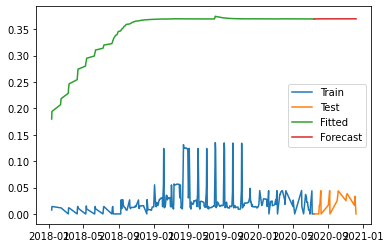

In [19]:
# Make forecast
# Convert variance to standard deviation (volatility)
# Revert previous multiplication by 100
forecast = 0.1 * np.sqrt(res.forecast(horizon=forecast_horizon).variance.values[-1])

# Store actual, fitted, and forecasted results
vol = pd.DataFrame({
    'actual': df['volatility'],
    'returns': df['daily_ret'],
    'model': np.append(fitted, forecast)
})

# Plot Actual vs Fitted/Forecasted
plt.plot(vol['actual'][:-forecast_horizon], label='Train')
plt.plot(vol['actual'][-forecast_horizon - 1:], label='Test')
plt.plot(vol['model'][:-forecast_horizon], label='Fitted')
plt.plot(vol['model'][-forecast_horizon -1:], label='Forecast')
#plt.plot(vol['returns'][-forecast_horizon -1:], label='returns')

plt.legend()
plt.show()

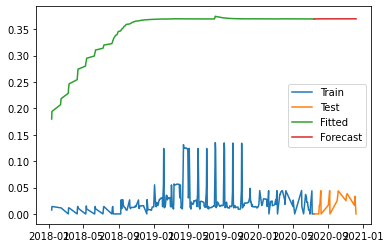

In [20]:
# Make forecast
# Convert variance to standard deviation (volatility)
# Revert previous multiplication by 100
forecast = 0.1 * np.sqrt(res.forecast(horizon=forecast_horizon).variance.values[-1])

# Store actual, fitted, and forecasted results
vol = pd.DataFrame({
    'actual': df['volatility'],
    'model': np.append(fitted, forecast)
})

# Plot Actual vs Fitted/Forecasted
plt.plot(vol['actual'][:-forecast_horizon], label='Train')
plt.plot(vol['actual'][-forecast_horizon - 1:], label='Test')
plt.plot(vol['model'][:-forecast_horizon], label='Fitted')
plt.plot(vol['model'][-forecast_horizon - 1:], label='Forecast')
plt.legend()
plt.show()

In [21]:
vol.head(50)


actual     model
DATE                          
2018-01-10  0.007444  0.179721
2018-01-11  0.014062  0.194130
2018-02-10  0.011678  0.206910
2018-02-12  0.011398  0.218296
2018-03-09  0.000000  0.228569
2018-03-10  0.011457  0.237901
2018-03-12  0.011313  0.246424
2018-04-09  0.000000  0.254244
2018-04-10  0.011728  0.261442
2018-04-11  0.014193  0.268091
2018-04-12  0.010961  0.274244
2018-05-08  0.000000  0.279952
2018-05-09  0.000000  0.285259
2018-05-11  0.015062  0.290213
2018-05-12  0.009423  0.294823
2018-06-08  0.000000  0.299130
2018-06-09  0.000000  0.303155
2018-06-11  0.014166  0.306924
2018-06-12  0.009731  0.310458
2018-07-08  0.000000  0.313770
2018-07-10  0.011845  0.316879
2018-07-11  0.013981  0.319797
2018-08-08  0.000000  0.322545
2018-08-10  0.012468  0.325133
2018-08-11  0.014064  0.327561
2018-08-13  0.000000  0.329850
2018-08-14  0.000000  0.332003
2018-08-16  0.000000  0.334050
2018-08-19  0.000000  0.335965
2018-08-20  0.000000  0.337772
2018-08-26  0.000000  0.339491
2018-08-27  0.000000  0.341094
2018-08-28  0.000000  0.342611
2018-08-29  0.000000  0.344039
2018-08-30  0.000000  0.345389
2018-09-08  0.000000  0.346668
2018-09-09  0.026475  0.347871
2018-09-10  0.012566  0.349010
2018-09-12  0.010054  0.350084
2018-09-13  0.026885  0.351099
2018-09-16  0.026632  0.352059
2018-09-17  0.015074  0.352966
2018-09-18  0.014887  0.353825
2018-09-19  0.014919  0.354638
2018-09-20  0.012636  0.355407
2018-09-23  0.011716  0.356134
2018-09-24  0.011454  0.356822
2018-09-25  0.009124  0.357473
2018-09-26  0.008527  0.358089
2018-09-27  0.007346  0.358673

In [ ]:
print(vol.isnull())

     actual  model   date
0     False  False  False
1     False  False  False
2     False  False  False
3     False  False  False
4     False  False  False
..      ...    ...    ...
432   False  False  False
433   False  False  False
434   False  False  False
435   False  False  False
436   False  False  False

[437 rows x 3 columns]


In [22]:
forecast= (vol.actual, vol.model)

In [23]:
import math


In [24]:
from sklearn.metrics import mean_squared_error

rmse =mean_squared_error(vol.actual, vol.model,squared=False)

print(rmse)


0.3402574232079219


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
r2_score(vol.actual, vol.model)

In [ ]:
mean_absolute_error(vol.actual, vol.model)

In [ ]:
vol.head()

actual     model
0     0.0  0.245465
1     0.0  0.239525
2     0.0  0.232408
3     0.0  0.229499
4     0.0  0.228595

In [ ]:
vol.drop('model',
  axis='columns', inplace=True)

In [ ]:
train=vol[0:400] 
test=vol[400:]


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
df.tail(50)

#       DATE  HIGH   LOW  ...    VOLUME  daily_ret  monthly_vol  volatility
387  50 2020-03-19  56.0  56.0  ...   10656.0   0.074856     0.041537    0.170315
388  49 2020-03-22  57.8  56.9  ...  323029.0   0.023214     0.042179    0.171953
389  48 2020-03-23  60.5  57.0  ...  133903.0   0.047120     0.043779    0.177390
390  47 2020-03-24  59.0  57.2  ...  196370.0  -0.025000     0.043984    0.178003
391  46 2020-03-25  59.3  57.3  ...   96996.0   0.005128     0.043977    0.176907
392  45 2020-05-31  58.8  56.9  ...   86877.0  -0.032313     0.044293    0.178475
393  44 2020-01-06  56.9  56.9  ...   60718.0   0.000000     0.044173    0.177714
394  43 2020-02-06   0.0   0.0  ...       0.0   0.000000     0.044049    0.171329
395  42 2020-03-06  56.9  56.9  ...     708.0   0.000000     0.043974    0.170722
396  41 2020-04-06  56.9  56.9  ...    2527.0   0.000000     0.043882    0.169949
397  40 2020-07-06  56.9  56.9  ...    2405.0   0.000000     0.043830    0.170031
398  39 2020-08-06  56.9  56.9  ...    3510.0   0.000000     0.043821    0.169605
399  38 2020-09-06  56.9  56.9  ...     185.0   0.000000     0.043823    0.169671
400  37 2020-10-06  56.9  56.9  ...     388.0   0.000000     0.043705    0.169399
401  36 2020-11-06  56.9  56.9  ...    3168.0   0.000000     0.038462    0.169066
402  35 2020-06-14  56.9  56.9  ...     435.0   0.000000     0.036819    0.168456
403  34 2020-06-15   0.0   0.0  ...       0.0   0.000000     0.033612    0.167863
404  33 2020-06-16  56.9  56.9  ...     120.0   0.000000     0.032895    0.167503
405  32 2020-06-17  56.9  56.9  ...     150.0   0.000000     0.032185    0.167198
406  31 2020-06-18  56.9  56.9  ...       9.0   0.000000     0.021962    0.167033
407  30 2020-06-21  56.9  56.9  ...     205.0   0.000000     0.021962    0.166951
408  29 2020-06-22   0.0   0.0  ...       0.0   0.000000     0.014898    0.166931
409  28 2020-06-23  56.9  56.9  ...     701.0   0.000000     0.013990    0.166412
410  27 2020-06-24  56.9  56.9  ...     100.0   0.000000     0.008848    0.146430
411  26 2020-06-25  56.9  56.9  ...     749.0   0.000000     0.007195    0.140122
412  25 2020-06-28  56.9  56.9  ...     854.0   0.000000     0.007051    0.128148
413  24 2020-06-29  56.9  56.9  ...     781.0   0.000000     0.000000    0.125259
414  23 2020-06-30  56.9  56.9  ...    2850.0   0.000000     0.000000    0.122489
415  22 2020-02-07  56.9  56.9  ...    9999.0   0.000000     0.000000    0.084111
416  21 2020-05-07  56.9  56.9  ...    7500.0   0.000000     0.000000    0.084111
417  20 2020-06-07  56.9  56.9  ...    1505.0   0.000000     0.000000    0.056726
418  19 2020-07-07  56.9  56.9  ...    1330.0   0.000000     0.000000    0.053244
419  18 2020-08-07  56.9  56.9  ...    4261.0   0.000000     0.000000    0.034088
420  17 2020-09-07  56.9  56.9  ...   10835.0   0.000000     0.000000    0.027519
421  16 2020-12-07  56.9  56.9  ...    4896.0   0.000000     0.000000    0.027035
422  15 2020-07-13  56.9  56.9  ...    4625.0   0.000000     0.000000    0.000000
423  14 2020-07-14  56.9  56.9  ...    8201.0   0.000000     0.000000    0.000000
424  13 2020-07-15  56.9  56.9  ...    2340.0   0.000000     0.000000    0.000000
425  12 2020-07-16  56.9  56.9  ...    1023.0   0.000000     0.000000    0.000000
426  11 2020-07-19  56.9  56.9  ...     250.0   0.000000     0.000000    0.000000
427  10 2020-07-20  56.9  56.9  ...     100.0   0.000000     0.000000    0.000000
428   9 2020-07-21  56.9  56.9  ...    1155.0   0.000000     0.000000    0.000000
429   8 2020-07-22  56.9  56.9  ...     916.0   0.000000     0.000000    0.000000
430   7 2020-07-23  56.9  56.9  ...    9351.0   0.000000     0.000000    0.000000
431   6 2020-07-26  56.9  56.9  ...     765.0   0.000000     0.000000    0.000000
432   5 2020-07-27  56.9  56.9  ...    8931.0   0.000000     0.000000    0.000000
433   4 2020-07-28  56.9  56.9  ...     117.0   0.000000     0.000000    0.000000
434   3 2020-07-29  56.9  56.9  ...    4428.0   0.000000     0.000000 

In [ ]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['actual']) ,seasonal_periods=30 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['actual'], label='Train')
plt.plot(test['actual'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

NameError: ignored

In [ ]:
#result_AR.plot_predict(1,40)
x=fit1.forecast()

NameError: ignored

In [ ]:
from math import sqrt

In [ ]:
rms = sqrt(mean_squared_error(test.actual, y_hat_avg.Holt_Winter))
print(rms)

0.16468388567645123


In [ ]:
df.head()

#       DATE   HIGH    LOW  ...  daily_ret  real_var  real_vol  volatility
0  437 2018-05-08  120.0  118.6  ...   0.000000       NaN       NaN         0.0
1  436 2018-06-08  118.9  117.1  ...  -0.009251       NaN       NaN         0.0
2  435 2018-07-08  121.9  117.1  ...  -0.001698       NaN       NaN         0.0
3  434 2018-08-08  121.0  117.6  ...   0.015306       NaN       NaN         0.0
4  433 2018-09-08  124.8  120.0  ...   0.018425       NaN       NaN         0.0

[5 rows x 11 columns]

In [ ]:
#download df.csv in local machine
from google.colab import files
df.to_csv('volat.csv') 
files.download("volat.csv")                                          

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from rpy2.robjects.packages import importr
import rpy2.robjects as robjects
from rpy2.robjects import numpy2ri



forecast_horizon = 30



In [ ]:
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects
from rpy2.robjects import numpy2ri


In [ ]:
df= df['DATE', 'CLOSEP*']

KeyError: ignored

In [ ]:
df['daily_returns'] = np.log(df['CLOSEP*']).diff()            # Daily log returns
df['monthly_std'] = df['daily_returns'].rolling(21).std()   # Standard deviation across trading month
df['annual_vol'] = df['monthly_std'] * np.sqrt(252)         # Convert monthly standard devation to annualized volatility
df = df.dropna().reset_index(drop=True)


In [ ]:

from rpy2.robjects.packages import importr
import rpy2.robjects as robjects
from rpy2.robjects import numpy2ri

import rugarch from arch


SyntaxError: ignored

In [ ]:
# Initialize R GARCH model
rugarch = importr('rugarch')
garch_spec = arch.ugarchspec(
    mean_model=robjects.r('list(armaOrder = c(0,0))'),
    variance_model=robjects.r('list(garchOrder=c(1,1))'),
    distribution_model='std'
)

SyntaxError: ignored

In [ ]:
!pip install arch

In [ ]:
df1= df['DATE', 'CLOSEP*']

df['daily_returns'] = np.log(df['CLOSEP*']).diff()            # Daily log returns
df['monthly_std'] = df['daily_returns'].rolling(21).std()   # Standard deviation across trading month
df['annual_vol'] = df['monthly_std'] * np.sqrt(252)         # Convert monthly standard devation to annualized volatility
df = df.dropna().reset_index(drop=True)

# Initialize R GARCH model
rugarch = importr('rugarch')
garch_spec = rugarch.ugarchspec(
    mean_model=robjects.r('list(armaOrder = c(0,0))'),
    variance_model=robjects.r('list(garchOrder=c(1,1))'),
    distribution_model='std'
)

# Used to convert training set to R list for model input
numpy2ri.activate()

# Train R GARCH model on returns as %
garch_fitted = rugarch.ugarchfit(
    spec=garch_spec,
    data=df['daily_returns'].values * 100,
    out_sample=forecast_horizon
)

numpy2ri.deactivate()

# Model's fitted standard deviation values
# Revert previous multiplication by 100
# Convert to annualized volatility
fitted = 0.01 * np.sqrt(252) * np.array(garch_fitted.slots['fit'].rx2('sigma')).flatten()

# Forecast using R GACRH model
garch_forecast = rugarch.ugarchforecast(
    garch_fitted,
    n_ahead=1,
    n_roll=forecast_horizon - 1
)

# Model's forecasted standard deviation values
# Revert previous multiplication by 100
# Convert to annualized volatility
forecast = 0.01 * np.sqrt(252) * np.array(garch_forecast.slots['forecast'].rx2('sigmaFor')).flatten()

volatility = pd.DataFrame({
    'actual': df['annual_vol'].values,
    'model': np.append(fitted, forecast),
})

plt.plot(volatility['actual'][:-forecast_horizon], label='Train')
plt.plot(volatility['actual'][-forecast_horizon - 1:], label='Test')
plt.plot(volatility['model'][:-forecast_horizon], label='Fitted')
plt.plot(volatility['model'][-forecast_horizon - 1:], label='Forecasted')
plt.legend()
plt.show(